In [1]:
#Hi

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim

from tqdm.notebook import tqdm 
import numpy as np



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Users/asus/Desktop/term6/shabake a/KaggleV2-May-2016.csv" # write the path of your file
df = pd.read_csv(file_path, header=0) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

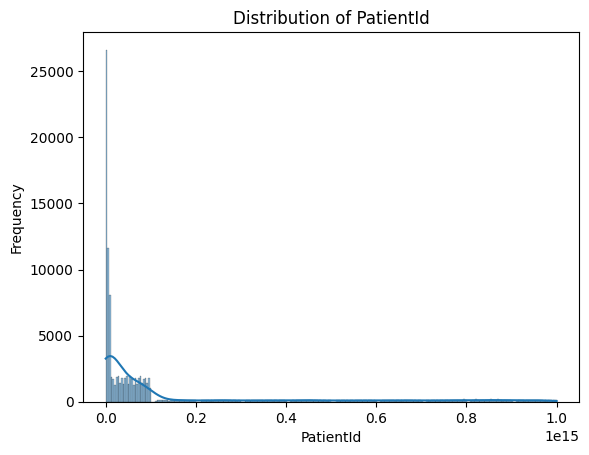

In [11]:
sns.histplot(df['PatientId'], kde=True)  # kde=True برای رسم منحنی چگالی احتمال همراه با نمودار
plt.title('Distribution of PatientId')
plt.xlabel('PatientId')
plt.ylabel('Frequency')
plt.show()


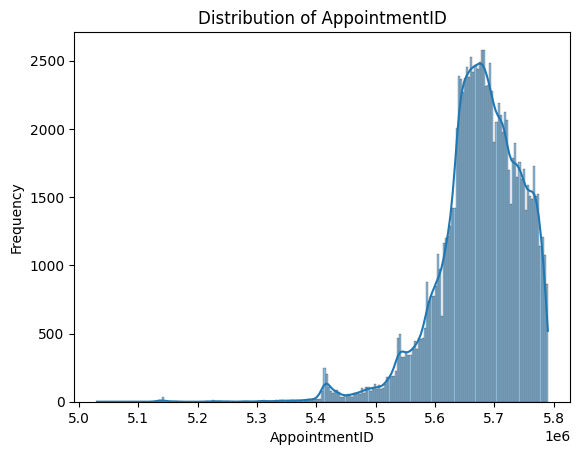

In [12]:
sns.histplot(df['AppointmentID'], kde=True)  # kde=True برای رسم منحنی چگالی احتمال همراه با نمودار
plt.title('Distribution of AppointmentID')
plt.xlabel('AppointmentID')
plt.ylabel('Frequency')
plt.show()


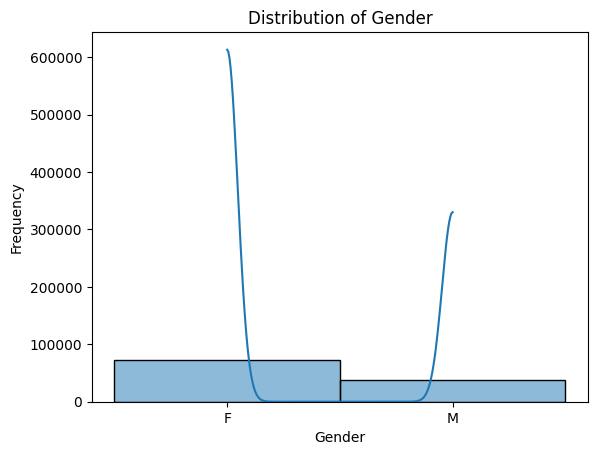

In [13]:
sns.histplot(df['Gender'], kde=True)  # kde=True برای رسم منحنی چگالی احتمال همراه با نمودار
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


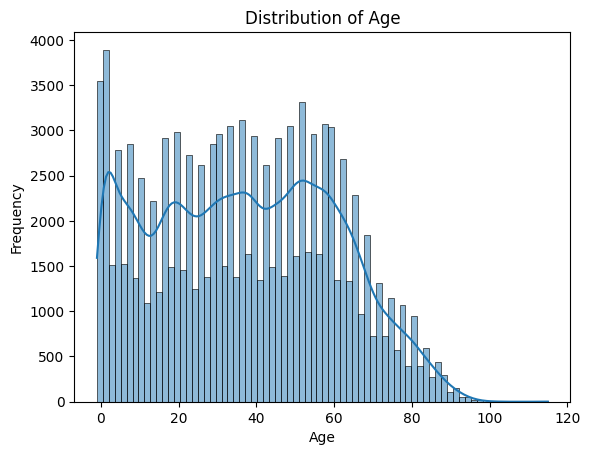

In [14]:
sns.histplot(df['Age'], kde=True)  # kde=True برای رسم منحنی چگالی احتمال همراه با نمودار
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [19]:
print(df)
for column in df.columns:
    df[column], _ = pd.factorize(df[column])

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [20]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,1,0,0,0,0,0
2,2,2,0,2,0,0,1,0,1,0,0,0,0,0
3,3,3,0,3,0,2,2,0,1,0,0,0,0,0
4,4,4,0,4,0,1,0,0,0,1,0,0,0,0


In [21]:
X = df.drop(columns=['No-show'],axis=1)


In [22]:
X.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,1,0,0,0,0
2,2,2,0,2,0,0,1,0,1,0,0,0,0
3,3,3,0,3,0,2,2,0,1,0,0,0,0
4,4,4,0,4,0,1,0,0,0,1,0,0,0


In [23]:
y = df['No-show']

In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110527, dtype: int64

In [25]:
X = X.values
y = y.values

In [26]:
y


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
X

array([[     0,      0,      0, ...,      0,      0,      0],
       [     1,      1,      1, ...,      0,      0,      0],
       [     2,      2,      0, ...,      0,      0,      0],
       ...,
       [ 62298, 110524,      0, ...,      0,      0,      1],
       [ 46016, 110525,      0, ...,      0,      0,      1],
       [ 27464, 110526,      0, ...,      0,      0,      1]], dtype=int64)

In [29]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((88421, 13), (22106, 13))

In [31]:
X_train

array([[ 37444,  58187,      0, ...,      0,      0,      0],
       [  4541,   5095,      1, ...,      0,      0,      0],
       [ 43368,  67919,      0, ...,      0,      0,      0],
       ...,
       [ 60183, 103694,      0, ...,      0,      0,      0],
       [   821,    860,      0, ...,      0,      0,      0],
       [  1182,  15795,      1, ...,      0,      0,      1]], dtype=int64)

In [32]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [33]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [34]:
X_train

tensor([[3.7444e+04, 5.8187e+04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.5410e+03, 5.0950e+03, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.3368e+04, 6.7919e+04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [6.0183e+04, 1.0369e+05, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.2100e+02, 8.6000e+02, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1820e+03, 1.5795e+04, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]])

In [37]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, num_inputs=13, num_hidden=649, num_2=649, num_output=2, dropout_rate=0.5, weight_decay=0.01):
        super().__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(num_hidden, num_2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.out = nn.Linear(num_2, num_output)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.out(x)
        return x

In [38]:
torch.manual_seed(41)
model = Model()

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01,weight_decay=0.01)

In [40]:
# Find unique labels
unique_labels = torch.unique(y_train)

# Remap labels to start from 0
for i, label in enumerate(unique_labels):
    y_train = torch.where(y_train == label, i, y_train)
    y_test = torch.where(y_test == label, i, y_test)


In [42]:
X_train

tensor([[3.7444e+04, 5.8187e+04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.5410e+03, 5.0950e+03, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.3368e+04, 6.7919e+04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [6.0183e+04, 1.0369e+05, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.2100e+02, 8.6000e+02, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1820e+03, 1.5795e+04, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]])

In [43]:
y_train

tensor([0, 0, 1,  ..., 0, 0, 0])

In [48]:

epochs = 10
losses = []
for i in range(epochs):

    y_pred = model.forward(X_train) 

    loss = criterion(y_pred , y_train)

    #losses.append(loss.detach().numpy())
    losses.append(loss.item())
    
    print(f'epoch{i} and loss = {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch0 and loss = 2892.2939453125
epoch1 and loss = 99183.78125
epoch2 and loss = 47806.13671875
epoch3 and loss = 15096.0927734375
epoch4 and loss = 3717.713134765625
epoch5 and loss = 490.9041442871094
epoch6 and loss = 529.9544067382812
epoch7 and loss = 122.07396697998047
epoch8 and loss = 10.487436294555664
epoch9 and loss = 1.2439846992492676


In [49]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [50]:
loss

tensor(0.7038)

In [51]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print (f'{i+1}. {str(y_val)} \t {y_test[i]}')

1. tensor([-0.0062, -0.0436]) 	 0
2. tensor([-0.0062, -0.0436]) 	 0
3. tensor([-0.0062, -0.0436]) 	 1
4. tensor([-0.0062, -0.0436]) 	 1
5. tensor([-0.0062, -0.0436]) 	 0
6. tensor([-0.0062, -0.0436]) 	 0
7. tensor([-0.0062, -0.0436]) 	 0
8. tensor([-0.0062, -0.0436]) 	 0
9. tensor([-0.0062, -0.0436]) 	 0
10. tensor([-0.0062, -0.0436]) 	 1
11. tensor([-0.0062, -0.0436]) 	 1
12. tensor([-0.0062, -0.0436]) 	 0
13. tensor([-0.0062, -0.0436]) 	 0
14. tensor([-0.0062, -0.0436]) 	 0
15. tensor([-0.0062, -0.0436]) 	 0
16. tensor([-0.0062, -0.0436]) 	 1
17. tensor([-0.0062, -0.0436]) 	 1
18. tensor([-0.0062, -0.0436]) 	 0
19. tensor([-0.0062, -0.0436]) 	 0
20. tensor([-0.0062, -0.0436]) 	 0
21. tensor([-0.0062, -0.0436]) 	 0
22. tensor([-0.0062, -0.0436]) 	 1
23. tensor([-0.0062, -0.0436]) 	 0
24. tensor([-0.0062, -0.0436]) 	 0
25. tensor([-0.0062, -0.0436]) 	 0
26. tensor([-0.0062, -0.0436]) 	 0
27. tensor([-0.0062, -0.0436]) 	 0
28. tensor([-0.0062, -0.0436]) 	 0
29. tensor([-0.0062, -0.0436]

In [52]:
def calculate_accuracy(y_true, y_pred):
   
   
    _, predicted = torch.max(y_pred, 1)
    
    # Calculate accuracy
    correct = (predicted == y_true).sum().item()
    total = y_true.size(0)
    accuracy = correct / total
    
    return accuracy


In [53]:

with torch.no_grad():
    y_pred_train = model(X_train)
    train_accuracy = calculate_accuracy(y_train, y_pred_train)
    print("Training Accuracy:", train_accuracy)

    y_pred_test = model(X_test)
    test_accuracy = calculate_accuracy(y_test, y_pred_test)
    print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7973105936372581
Testing Accuracy: 0.7988328960463222


In [54]:
import torch

def mean_squared_error(y_true, y_pred):
   
    mse = torch.mean((y_true - y_pred)**2).item()
    return mse

def mean_absolute_error(y_true, y_pred):
    
    mae = torch.mean(torch.abs(y_true - y_pred)).item()
    return mae


In [55]:
# After training the model
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred_train = model(X_train)
    #mse_train = mean_squared_error(y_train, y_pred_train)
    #mae_train = mean_absolute_error(y_train, y_pred_train)
    #print("Training MSE:", mse_train)
    #print("Training MAE:", mae_train)

    y_pred_test = model(X_test)
    #mse_test = mean_squared_error(y_test, y_pred_test)
    #mae_test = mean_absolute_error(y_test, y_pred_test)
    #print("Testing MSE:", mse_test)
    #print("Testing MAE:", mae_test)

    print("Shape of y_true:", y_test.size())
    print("Shape of y_pred:", y_pred_test.size())

    y_true_indextrain = torch.argmax(y_train.unsqueeze(dim=0), dim=1).float()
    y_pred_indextrain = torch.argmax(y_pred_train.unsqueeze(dim=0), dim=1).float()

    y_true_indextest = torch.argmax(y_test.unsqueeze(dim=0), dim=1).float()
    y_pred_indextest = torch.argmax(y_pred_test.unsqueeze(dim=0), dim=1).float()

    print("Shape of y_true:", y_true_indextrain)
    print("Shape of y_pred:", y_pred_indextrain)
    mse_train = mean_squared_error(y_true_indextrain, y_pred_indextrain)
    mae_train = mean_absolute_error(y_true_indextrain, y_pred_indextrain)
    print("Training MSE:", mse_train)
    print("Training MAE:", mae_train)

    mse_test = mean_squared_error(y_true_indextest, y_pred_indextest)
    mae_test = mean_absolute_error(y_true_indextest, y_pred_indextest)
    print("Testing MSE:", mse_test)
    print("Testing MAE:", mae_test)

    

Shape of y_true: torch.Size([22106])
Shape of y_pred: torch.Size([22106, 2])
Shape of y_true: tensor([2.])
Shape of y_pred: tensor([[41520., 41520.]])
Training MSE: 1723744384.0
Training MAE: 41518.0
Testing MSE: 202749392.0
Testing MAE: 10069.5


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score


with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    f1 = f1_score(y_test, predicted, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.6742622642482932
Recall: 0.7987876594589705
F1-score: 0.7101341241620398


In [59]:

def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs=10):
    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(num_epochs):
        
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            test_loss = criterion(outputs, y_test)
            test_losses.append(test_loss.item())
            _, predicted = torch.max(outputs, 1)
            accuracy = (predicted == y_test).float().mean().item()
            accuracies.append(accuracy)

    return train_losses, test_losses, accuracies


model = Model()
criterion = nn.CrossEntropyLoss()


optimizers = {
    'Adam': optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01),
    'SGD': optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    
}

results = {}
for optimizer_name, optimizer in optimizers.items():
    
    train_losses, test_losses, accuracies = train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test)
    results[optimizer_name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracies': accuracies
    }


for optimizer_name, result in results.items():
    print(f"Optimizer: {optimizer_name}")
    print(f"Final Accuracy: {result['accuracies'][-1]}")
    print(f"Convergence Speed: {len(result['accuracies'])} epochs")
    print()


Optimizer: Adam
Final Accuracy: 0.7992852330207825
Convergence Speed: 10 epochs

Optimizer: SGD
Final Accuracy: 0.7992852330207825
Convergence Speed: 10 epochs

